# Illustration of the preconditioned matrix

In [ ]:
import numpy as np
from scipy.linalg import sqrtm

# Illustration of the function of preconditioned matrix B
L = np.array([[1, -1], [-1, 1]])
E = np.eye(2)

B_2 = E - 0.25 * L
B_3 = E - 0.499 * L

sqrt_B_2 = sqrtm(B_2)
sqrt_B_3 = sqrtm(B_3)

Q = np.diag([0.1, 0.8])
Q_2 = sqrt_B_2 @ Q @ sqrt_B_2
Q_3 = sqrt_B_3 @ Q @ sqrt_B_3

p = np.array([-0.45, -0.45])
p_2 = sqrt_B_2 @ p
p_3 = sqrt_B_3 @ p

x = np.linspace(-0.6, 0.8, 2000)
y = np.linspace(-0.6, 0.8, 2000)
X, Y = np.meshgrid(x, y)

Z = Q[0, 0] * X**2 + Q[1, 1] * Y**2 + p[0] * X + p[1] * Y
Z_2 = (
    Q_2[0, 0] * X**2
    + (Q_2[0, 1] + Q_2[1, 0]) * X * Y
    + Q_2[1, 1] * Y**2
    + p_2[0] * X
    + p_2[1] * Y
)
Z_3 = (
    Q_3[0, 0] * X**2
    + (Q_3[0, 1] + Q_3[1, 0]) * X * Y
    + Q_3[1, 1] * Y**2
    + p_3[0] * X
    + p_3[1] * Y
)

T = 20
gamma = 0.5

A = E - 0.499 * L
sqrt_C = 0.12 * L

xx_ini = np.array([[-0.5, -0.5]])
xx_1 = np.tile(xx_ini, (T, 1)).T
xx_2 = np.tile(xx_ini, (T, 1)).T
xx_3 = np.tile(xx_ini, (T, 1)).T

yy_1 = np.zeros((2, T))
yy_2 = np.zeros((2, T))
yy_3 = np.zeros((2, T))

for k in range(T - 1):
    xx_1[:, k + 1] = (
        A @ xx_1[:, k] - gamma * (2 * Q @ xx_1[:, k] + p) - sqrt_C @ yy_1[:, k]
    )
    xx_2[:, k + 1] = (
        A @ xx_2[:, k] - gamma * B_2 @ (2 * Q @ xx_2[:, k] + p) - sqrt_C @ yy_2[:, k]
    )
    xx_3[:, k + 1] = (
        A @ xx_3[:, k] - gamma * B_3 @ (2 * Q @ xx_3[:, k] + p) - sqrt_C @ yy_3[:, k]
    )

    yy_1[:, k + 1] = yy_1[:, k] + sqrt_C @ xx_1[:, k + 1]
    yy_2[:, k + 1] = yy_2[:, k] + sqrt_C @ xx_2[:, k + 1]
    yy_3[:, k + 1] = yy_3[:, k] + sqrt_C @ xx_3[:, k + 1]

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True  # 使用外部 LaTeX 编译器
plt.rcParams["font.family"] = "serif"  # 设置字体为 LaTeX 的默认 serif 字体
plt.rcParams.update({"font.size": 25})

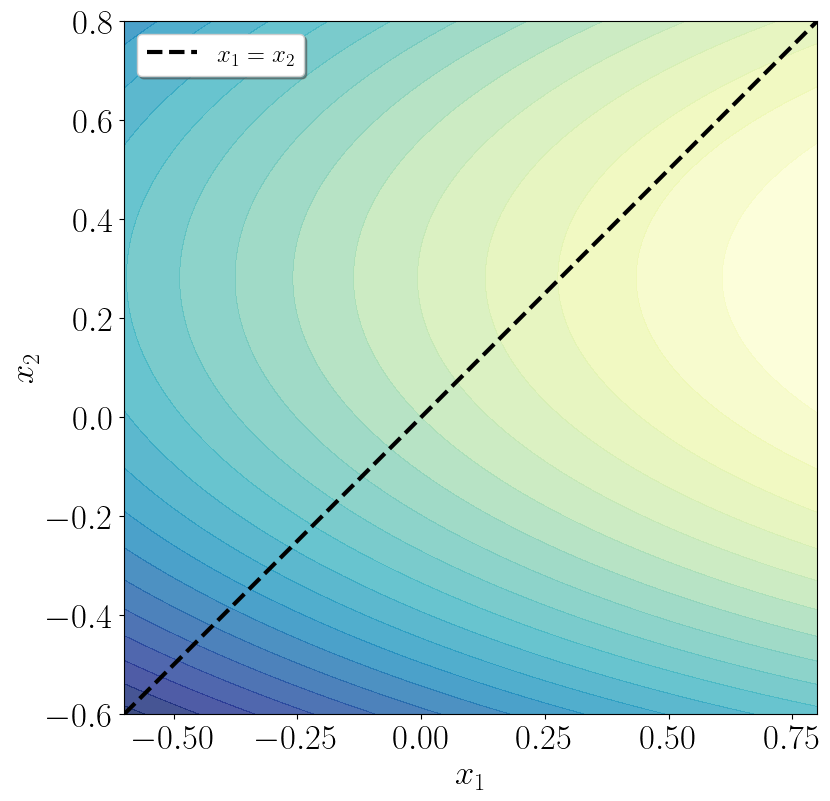

In [4]:
fig1, ax1 = plt.subplots(figsize=(9, 9))
ax1.set_aspect(1)

ax1.contourf(X, Y, Z, levels=20, cmap="YlGnBu", alpha=0.8)
ax1.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax1.set_xlabel("$x_{1}$")
ax1.set_ylabel("$x_{2}$")
ax1.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

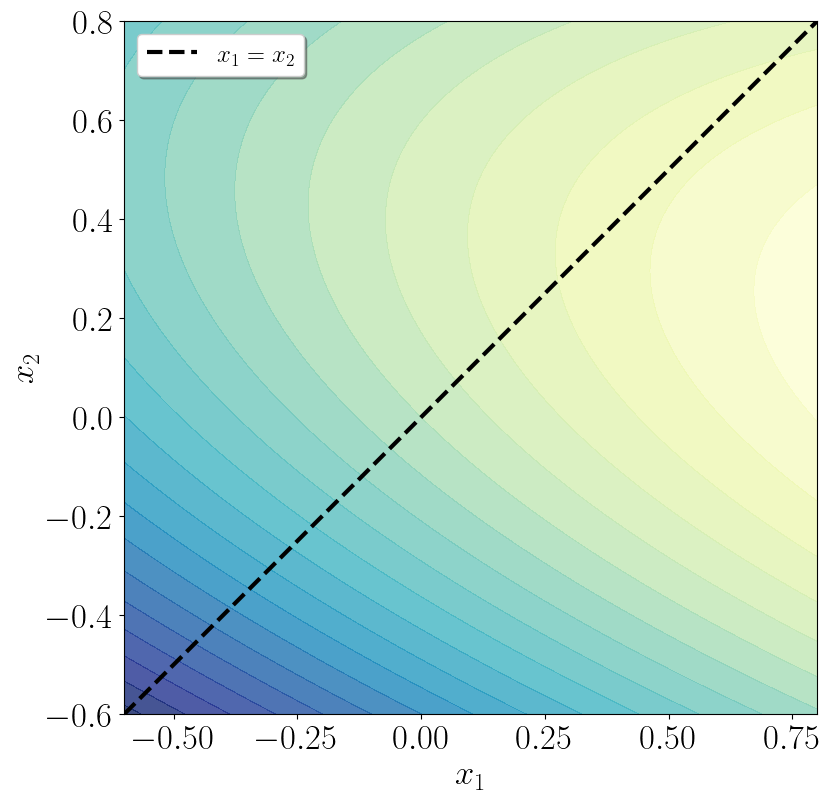

In [5]:
fig2, ax2 = plt.subplots(figsize=(9, 9))
ax2.set_aspect(1)

ax2.contourf(X, Y, Z_2, levels=20, cmap="YlGnBu", alpha=0.8)
ax2.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax2.set_xlabel("$x_{1}$")
ax2.set_ylabel("$x_{2}$")
ax2.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

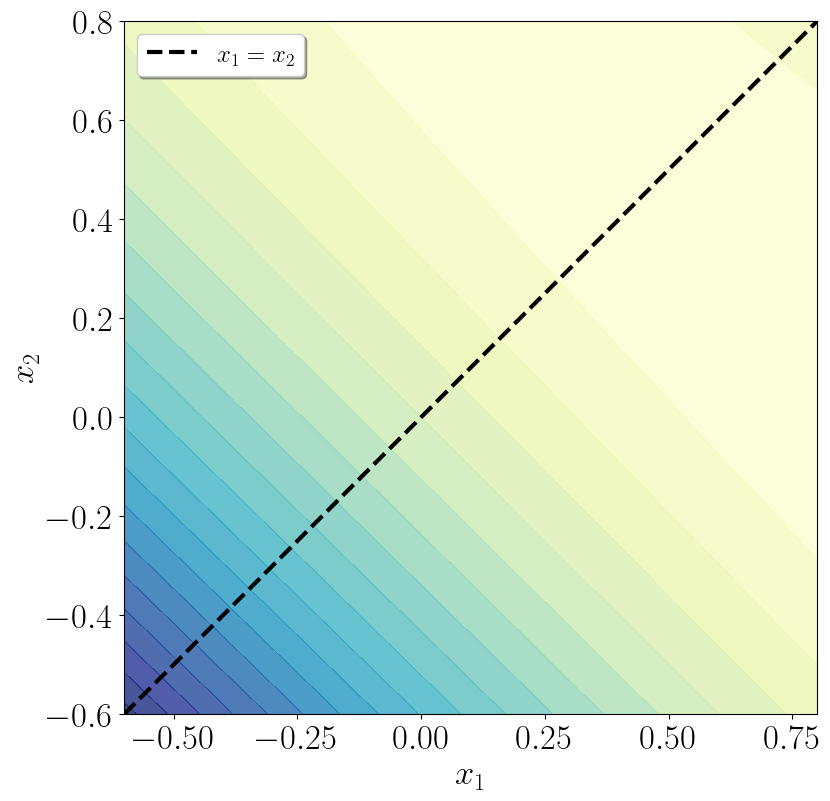

In [6]:
fig3, ax3 = plt.subplots(figsize=(9, 9))
ax3.set_aspect(1)

ax3.contourf(X, Y, Z_3, levels=20, cmap="YlGnBu", alpha=0.8)
ax3.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)

ax3.set_xlabel("$x_{1}$")
ax3.set_ylabel("$x_{2}$")
ax3.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()

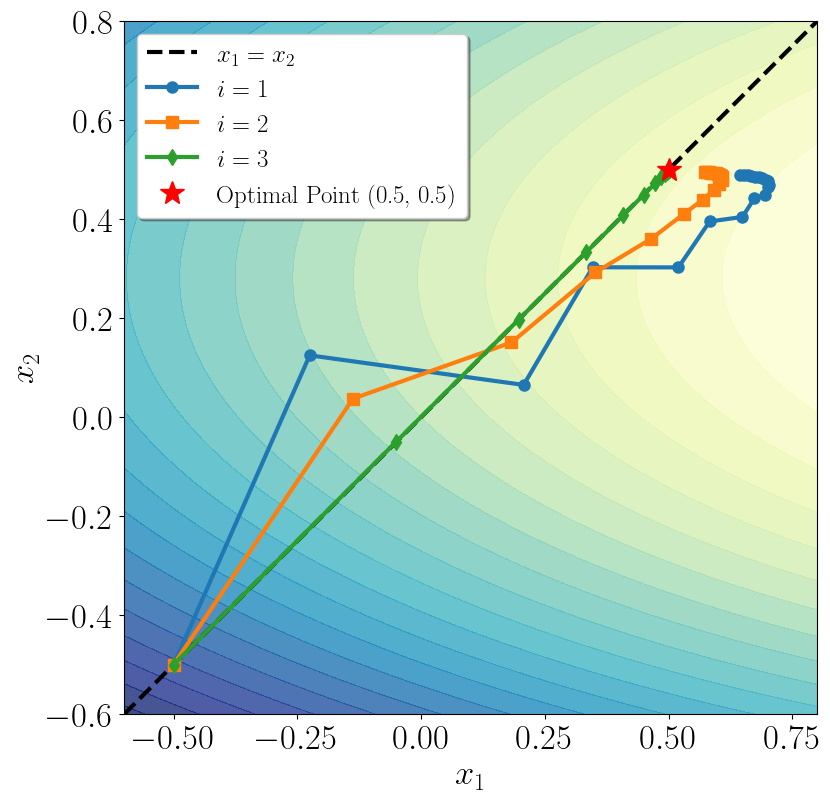

In [7]:
fig4, ax4 = plt.subplots(figsize=(9, 9))
ax4.set_aspect(1)

ax4.set_aspect(1)
ax4.set_xlabel("$x_{1}$")
ax4.set_ylabel("$x_{2}$")
ax4.set_xlim((-0.6, 0.8))
ax4.set_ylim((-0.6, 0.8))

ax4.plot([-0.6, 0.8], [-0.6, 0.8], "k--", label="$x_{1}=x_{2}$", linewidth=3)
contour = ax4.contourf(X, Y, Z, levels=20, cmap="YlGnBu", alpha=0.8)

ax4.plot(xx_1[0, :], xx_1[1, :], "o-", label="$i=1$", markersize=8, linewidth=3)
ax4.plot(xx_2[0, :], xx_2[1, :], "s-", label="$i=2$", markersize=8, linewidth=3)
ax4.plot(xx_3[0, :], xx_3[1, :], "d-", label="$i=3$", markersize=8, linewidth=3)

ax4.plot(0.5, 0.5, "r*", markersize=18, label="Optimal Point (0.5, 0.5)")

ax4.legend(loc="upper left", fontsize=18, frameon=True, fancybox=True, shadow=True)

plt.show()